In [4]:
# Breast Cancer (Diagnosis) Classification Task.

### We aim to build a predictive `classification model` that can predict the `diagnosis of the breast cancer` based on certain features of the cell nucleus.

In [3]:
# import the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
%matplotlib inline

In [5]:
# de-compress and load our dataset
path = 'datasets/cancerd'
zfile_name = 'archive.zip'
dfile_name = 'data.csv'
def load_data(path=path):
    if not os.path.isdir(path):
       os.makedirs(path)
    # we could point at our zip file to be opened.
    with zipfile.ZipFile(zfile_name, 'r') as zfile:
         # we de-compressed it's content to extract the `data.csv` file.
         zfile.extractall(path)
    return pd.read_csv(os.path.join(path, dfile_name))

In [6]:
df = load_data(path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df['Unnamed: 32'].value_counts()

Series([], Name: Unnamed: 32, dtype: int64)

### we aim here to create a numerical attribute to replace our target categorical attribute `diagnosis`.
Consider that:<br>
`Benign`- > [0]
<br>`Malignant` - > [1]

In [10]:
temp = np.empty(df.shape[0], dtype='int64')
df['diagnosis_no'] = temp

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
for i in range(df.shape[0]):
    if df['diagnosis'].iloc[i]=='M': # if it's a malignant cancer so it's-> 1
       df['diagnosis_no'].iloc[i]=1
    else:
       df['diagnosis_no'].iloc[i]=0 # if it's a benign cancer so it's-> 0

C:\Users\kaban\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
df[['diagnosis', 'diagnosis_no']].iloc[-10:, :]

,diagnosis,diagnosis_no
559,B,0
560,B,0
561,B,0
562,M,1
563,M,1
564,M,1
565,M,1
566,M,1
567,M,1
568,B,0


### Preliminary investigations to detect the correlation between these given attributes and the cancer diagnosis.

In [14]:
#### Malignant examples represent: 37.258%

In [15]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_no
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E66E31160>,
      dtype=object)

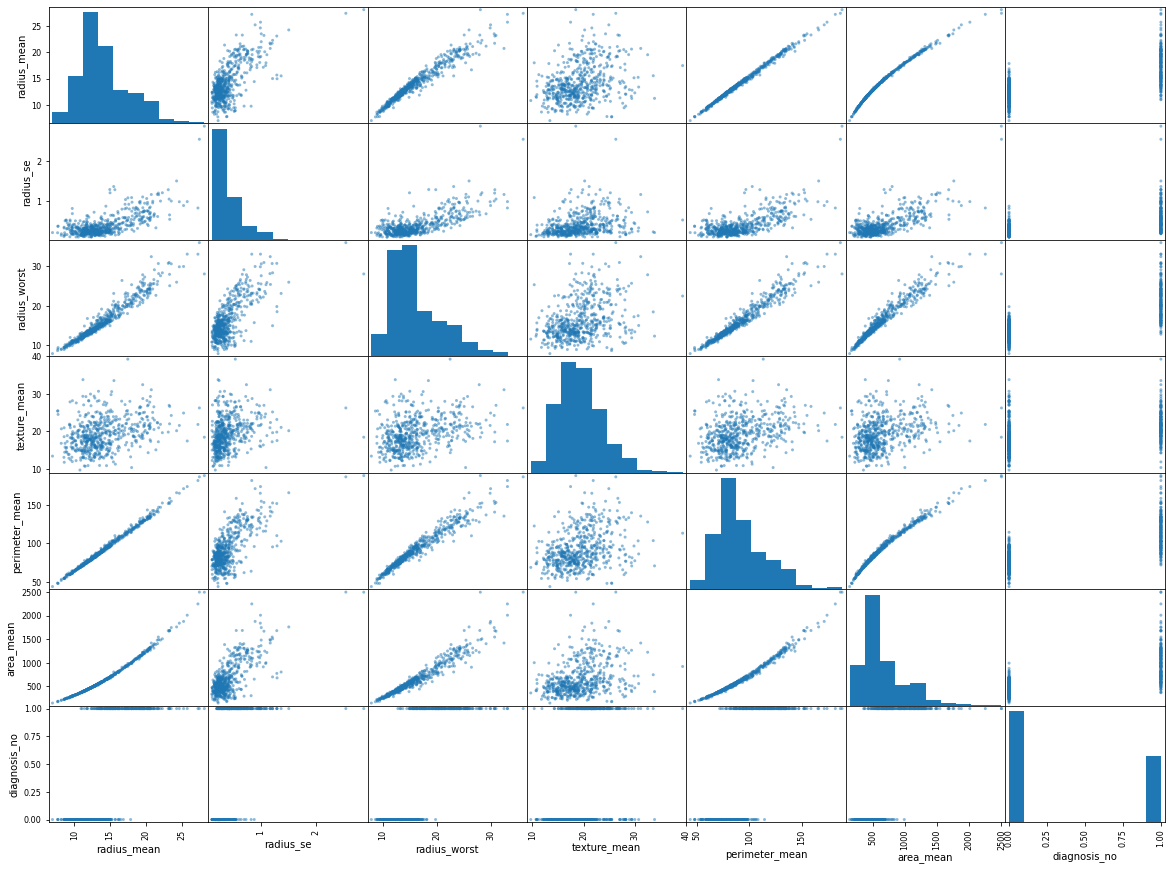

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['radius_mean', 'radius_se', 'radius_worst', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis_no']], figsize=(20, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E66D7FD00>,
      dtype=object)

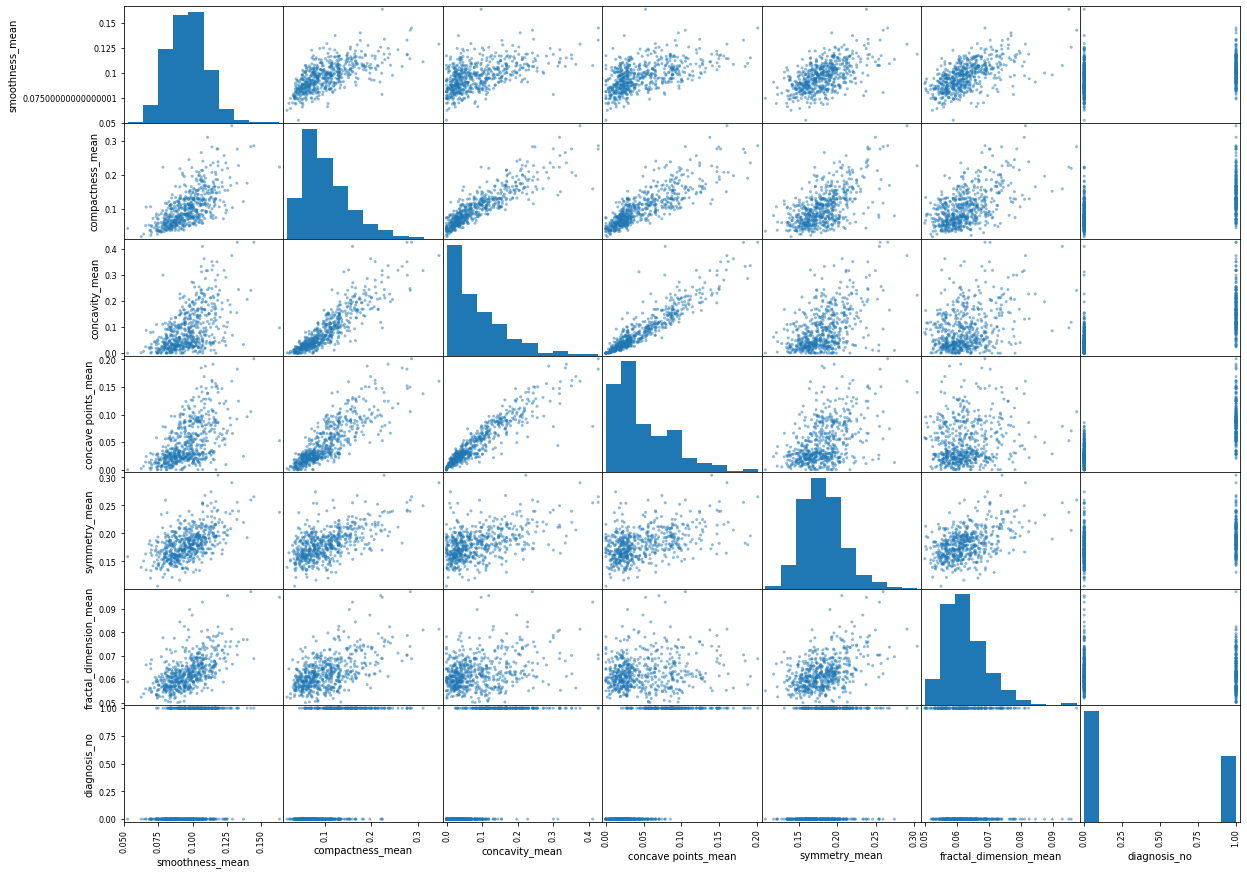

In [17]:
scatter_matrix(df[['smoothness_mean', 'compactness_mean', 'concavity_mean', 
                   'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'diagnosis_no']], figsize=(20, 15))

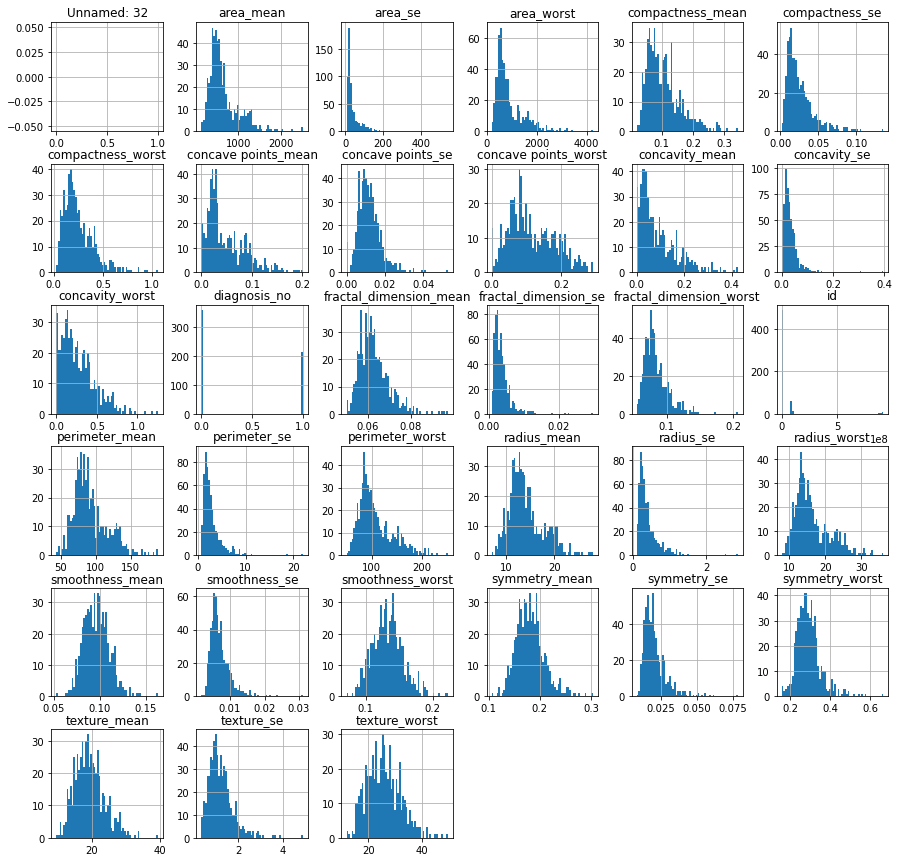

In [18]:
df.hist(figsize=(15, 15), bins=60)
plt.show()

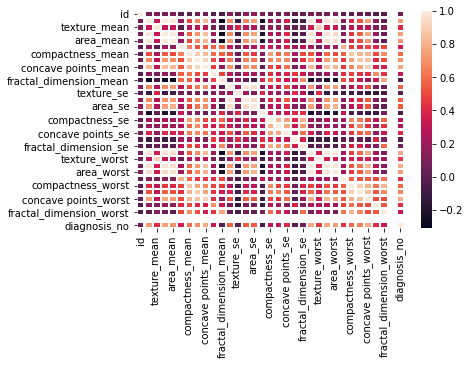

In [19]:
# we aim to detect the correlation between the cell nucelus features and cancer diagnosis.
corr_mat = df.corr()
sns.heatmap(corr_mat, linewidths=1.5)

In [20]:
# we can see that the `concave points_mean` attribute has the highest impact on the diagnosis type to be: Malignant.
corr_mat['diagnosis_no'].sort_values(ascending=False)

diagnosis_no               1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

### Let's go in-depth within the `concave points_worst` attribute to help us split efficiently our dataset.

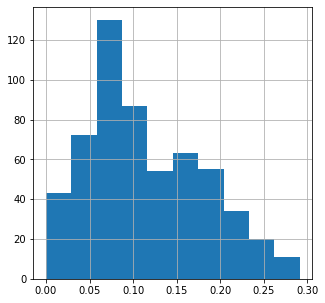

In [21]:
df['concave points_worst'].hist(figsize=(5, 5))
plt.show()

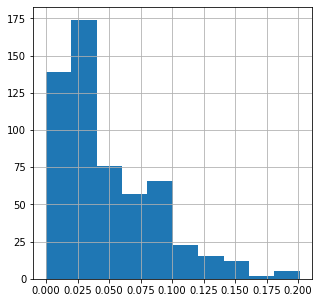

In [22]:
df['concave points_mean'].hist(figsize=(5, 5))
plt.show()

In [23]:
# let's generate discrete values for our `concave points_worst` attribute:
df['concave points_worst_cut'] = df['concave points_worst']//0.1*(0.1)

In [24]:
# let's try to split the dataset into training and testing datasets based on the `concave points_worst` attribute
from sklearn.model_selection import StratifiedShuffleSplit

strata_obj = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in strata_obj.split(df, df['concave points_worst_cut']):
    train_df = df.loc[train_idx]
    test_df = df.loc[test_idx]

In [25]:
train_df.shape, test_df.shape

((455, 35), (114, 35))

0.0    0.501099
0.1    0.371429
0.2    0.127473
Name: concave points_worst_cut, dtype: float64

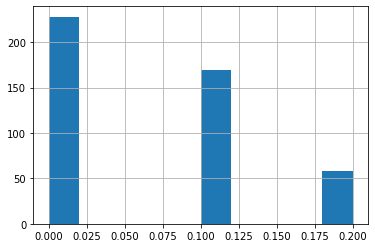

In [26]:
train_df['concave points_worst_cut'].hist()
train_df['concave points_worst_cut'].value_counts() / train_df.shape[0]

0.0    0.500000
0.1    0.377193
0.2    0.122807
Name: concave points_worst_cut, dtype: float64

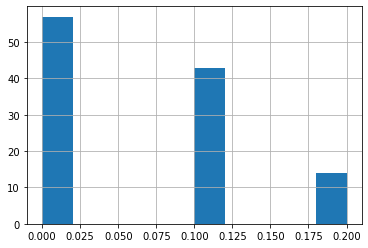

In [27]:
test_df['concave points_worst_cut'].hist()
test_df['concave points_worst_cut'].value_counts() / test_df.shape[0]

In [28]:
train_df_ = train_df.copy()

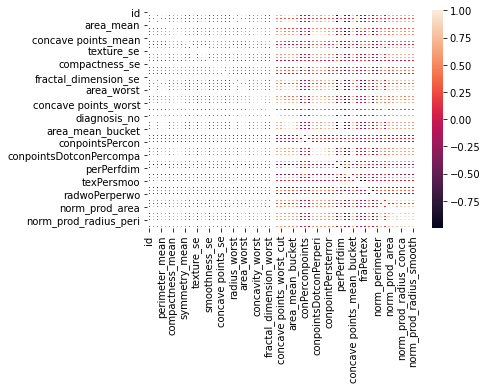

In [249]:
corr_mat_ = train_df_.corr()
sns.heatmap(corr_mat_, linewidths=1.5)

In [251]:
corr_mat_['diagnosis_no'].sort_values(ascending=False)['norm_prod_radius_concap']

0.7042525986280331

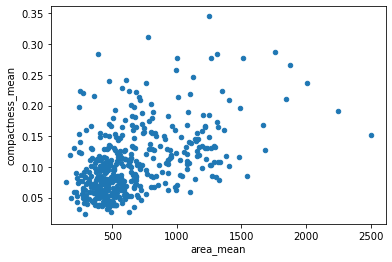

In [31]:
train_df.plot(kind='scatter', x='area_mean', y='compactness_mean')
plt.show()

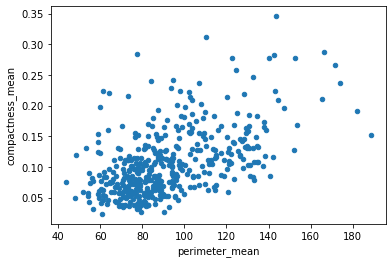

In [32]:
train_df.plot(kind='scatter', x='perimeter_mean', y='compactness_mean')
plt.show()

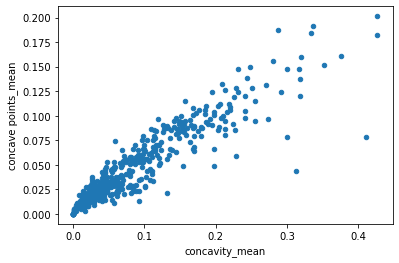

In [35]:
train_df.plot(kind='scatter', x='concavity_mean', y='concave points_mean')
plt.show()

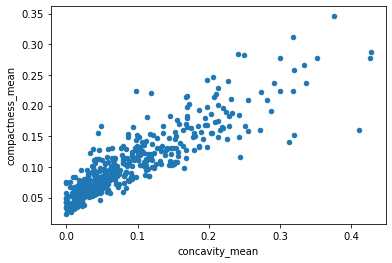

In [33]:
train_df.plot(kind='scatter', x='concavity_mean', y='compactness_mean')
plt.show()

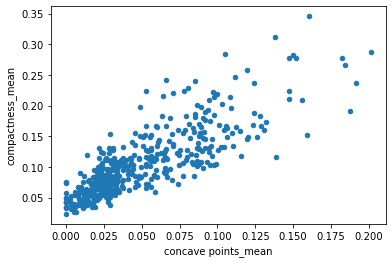

In [36]:
train_df.plot(kind='scatter', x='concave points_mean', y='compactness_mean')
plt.show()

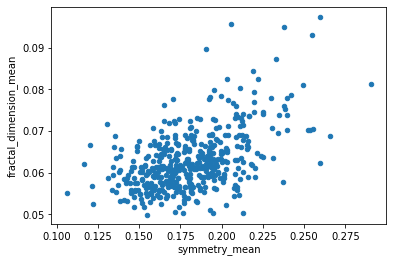

In [38]:
train_df.plot(kind='scatter', x='symmetry_mean', y='fractal_dimension_mean')
plt.show()

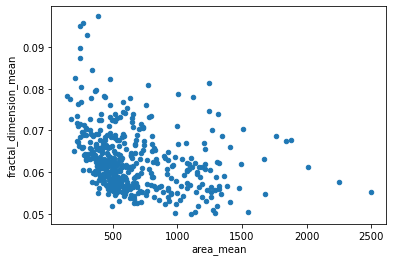

In [39]:
train_df.plot(kind='scatter', x='area_mean', y='fractal_dimension_mean')
plt.show()

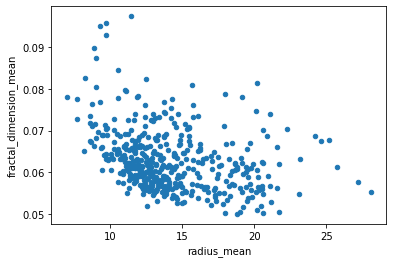

In [40]:
train_df.plot(kind='scatter', x='radius_mean', y='fractal_dimension_mean')
plt.show()

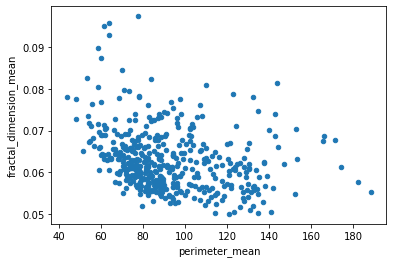

In [41]:
train_df.plot(kind='scatter', x='perimeter_mean', y='fractal_dimension_mean')
plt.show()

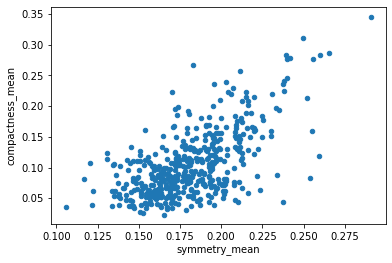

In [42]:
train_df.plot(kind='scatter', x='symmetry_mean', y='compactness_mean')
plt.show()

In [46]:
train_df['diagnosis'].value_counts()

B    286
M    169
Name: diagnosis, dtype: int64

In [61]:
# which tumor type that has the highest overall area?
train_df[['diagnosis', 'radius_mean']].groupby(['diagnosis'])['radius_mean'].mean()

diagnosis
B    12.130867
M    17.457160
Name: radius_mean, dtype: float64

In [62]:
train_df[['diagnosis', 'perimeter_mean']].groupby(['diagnosis'])['perimeter_mean'].mean()

diagnosis
B     78.001154
M    115.275503
Name: perimeter_mean, dtype: float64

In [63]:
train_df[['diagnosis', 'area_mean']].groupby(['diagnosis'])['area_mean'].mean()

diagnosis
B    461.629021
M    974.871006
Name: area_mean, dtype: float64

In [66]:
train_df[['diagnosis', 'compactness_mean']].groupby(['diagnosis'])['compactness_mean'].mean()

diagnosis
B    0.080976
M    0.145091
Name: compactness_mean, dtype: float64

In [67]:
train_df[['diagnosis', 'symmetry_mean']].groupby(['diagnosis'])['symmetry_mean'].mean()

diagnosis
B    0.174347
M    0.192059
Name: symmetry_mean, dtype: float64

In [68]:
train_df[['diagnosis', 'smoothness_mean']].groupby(['diagnosis'])['smoothness_mean'].mean()

diagnosis
B    0.092750
M    0.102604
Name: smoothness_mean, dtype: float64

### Malignant cancer type has a higher radius, perimeter and area than that for Benign cancer.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E6F0B8610>,
      dtype=object)

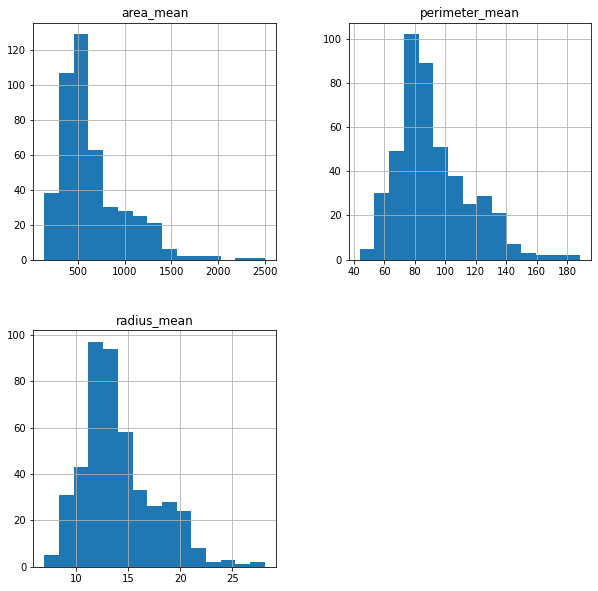

In [65]:
train_df[['radius_mean', 'perimeter_mean', 'area_mean', ]].hist(bins=15, figsize=(10, 10))

### I will replace the `radius_mean`, `perimeter_mean`, `area_mean` attributes with their buckets to help us detect a better signal.  

In [89]:
train_df_['radius_mean_bucket'] = train_df_['radius_mean']//2*(2)
train_df_[['radius_mean_bucket', 'diagnosis_no']].groupby(['radius_mean_bucket'])['diagnosis_no'].mean()

radius_mean_bucket
6.0     0.000000
8.0     0.000000
10.0    0.043011
12.0    0.144928
14.0    0.486111
16.0    0.902439
18.0    1.000000
20.0    1.000000
22.0    1.000000
24.0    1.000000
26.0    1.000000
28.0    1.000000
Name: diagnosis_no, dtype: float64

In [79]:
train_df_['perimeter_mean_bucket'] = train_df_['perimeter_mean']//20*(20)
train_df_[['perimeter_mean_bucket', 'diagnosis_no']].groupby(['perimeter_mean_bucket'])['diagnosis_no'].mean()

perimeter_mean_bucket
40.0     0.000000
60.0     0.027586
80.0     0.237179
100.0    0.919355
120.0    1.000000
140.0    1.000000
160.0    1.000000
180.0    1.000000
Name: diagnosis_no, dtype: float64

In [83]:
train_df_['area_mean_bucket'] = train_df_['area_mean']//250*(250)
train_df_[['area_mean_bucket', 'diagnosis_no']].groupby(['area_mean_bucket'])['diagnosis_no'].mean()

area_mean_bucket
0.0       0.000000
250.0     0.041916
500.0     0.297297
750.0     0.900000
1000.0    1.000000
1250.0    1.000000
1500.0    1.000000
1750.0    1.000000
2000.0    1.000000
2250.0    1.000000
Name: diagnosis_no, dtype: float64

In [107]:
train_df[(train_df['area_mean']<500) & (train_df['area_mean']>250)]['diagnosis'].value_counts()

B    160
M      7
Name: diagnosis, dtype: int64

### let's try some feature engineering to combine some features together.

In [115]:
# compactness_mean / concavity_mean  concaPercompa                 0.683324
train_df_['compaPerconca'] = train_df_['compactness_mean'] / train_df_['concavity_mean']

In [127]:
#  concave points_mean / concavity_mean
train_df_['conpointsPercon'] = train_df_['concave points_mean'] / train_df_['concavity_mean']

In [130]:
#  concave points_mean * concavity_mean
train_df_['conpointsDotcon'] = train_df_['concave points_mean'] * train_df_['concavity_mean']

In [133]:
#  (concave points_mean * concavity_mean)/perimeter
train_df_['conpointsDotconPerperi'] = (train_df_['concave points_mean'] * train_df_['concavity_mean']) / train_df_['perimeter_mean']

In [136]:
#  (concave points_mean * concavity_mean)/radius
train_df_['conpointsDotconPerrad'] = (train_df_['concave points_mean'] * train_df_['concavity_mean']) / train_df_['radius_mean']

### Good!

In [139]:
#  (concave points_mean * concavity_mean)/compactness_mean   conpointsDotconPercompa
train_df_['conpointsDotconPercompa'] = (train_df_['concave points_mean'] * train_df_['concavity_mean']) / train_df_['compactness_mean']

In [143]:
#  concave points_mean / concave points_se   conpointPersterror
train_df_['conpointPersterror'] = train_df_['concave points_mean'] / train_df_['concave points_se']

In [147]:
#  (concave points_mean*concavity_mean) / concave points_se
train_df_['conpointDotconPersterror'] = (train_df_['concave points_mean']*train_df_['concavity_mean']) / train_df_['concave points_se']

In [150]:
#  fractal_dimension_mean) / perimeter_mean
train_df_['fdimnPerper'] = train_df_['fractal_dimension_mean'] / train_df_['perimeter_mean']

In [153]:
# perimeter_mean / fractal_dimension_mean
train_df_['perPerfdim'] = train_df_['perimeter_mean'] / train_df_['fractal_dimension_mean']

In [162]:
#  fractal_dimension_mean) / compactness_mean
train_df_['fdimnPercom'] = train_df_['fractal_dimension_mean'] / train_df_['compactness_mean']

In [163]:
#  fractal_dimension_mean) / smoothness_mean
train_df_['fdimnPersmoo'] = train_df_['fractal_dimension_mean'] / train_df_['smoothness_mean']

In [171]:
train_df_['concave points_mean_bucket'] = train_df_['concave points_mean']//0.05*(0.05)
train_df_[['concave points_mean_bucket', 'diagnosis_no']].groupby(['concave points_mean_bucket'])['diagnosis_no'].mean()

concave points_mean_bucket
0.00    0.054152
0.05    0.820896
0.10    1.000000
0.15    1.000000
0.20    1.000000
Name: diagnosis_no, dtype: float64

In [174]:
#  texture_mean / smoothness_mean
train_df_['texPersmoo'] = train_df_['texture_mean'] / train_df_['smoothness_mean']

In [177]:
#  smoothness_mean / texture_mean
train_df_['smooPertex'] = train_df_['smoothness_mean'] / train_df_['texture_mean']

In [180]:
#  fractal_dimension_mean / texture_mean
train_df_['fraPertex'] = train_df_['fractal_dimension_mean'] / train_df_['texture_mean']

In [183]:
#  perimeter_worst / radius_worst
train_df_['perwoPerradwo'] = train_df_['perimeter_worst'] / train_df_['radius_worst']

In [186]:
#   radius_worst / perimeter_worst
train_df_['radwoPerperwo'] = train_df_['radius_worst'] / train_df_['perimeter_worst']

In [195]:
# (perimeter_worst - perimeter_mean) / perimeter_se
train_df_['norm_perimeter'] = (train_df_['perimeter_worst'] - train_df_['perimeter_mean']) / train_df_['perimeter_se']

In [199]:
# (perimeter_worst - perimeter_mean) * perimeter_se
train_df_['norm_prod_perimeter'] = (train_df_['perimeter_worst'] - train_df_['perimeter_mean']) * train_df_['perimeter_se']

In [203]:
# (fractal_dimension_worst - fractal_dimension_mean) * fractal_dimension_se
train_df_['norm_prod_fdimn'] = (train_df_['fractal_dimension_worst'] - train_df_['fractal_dimension_mean']) * train_df_['fractal_dimension_se']

In [207]:
# (area_worst - area_mean) * area_se
train_df_['norm_prod_area'] = (train_df_['area_worst'] - train_df_['area_mean']) * train_df_['area_se']

In [212]:
# (radius_worst - radius_mean) * radius_se
train_df_['norm_prod_radius'] = (train_df_['radius_worst'] - train_df_['radius_mean']) * train_df_['radius_se']

In [221]:
# (radius_worst - radius_mean) * compactness_se
train_df_['norm_prod_radius_comp'] = (train_df_['radius_worst'] - train_df_['radius_mean']) * train_df_['compactness_se']

In [246]:
# (radius_worst - radius_mean) * concave points_se
train_df_['norm_prod_radius_concap'] = (train_df_['radius_worst'] - train_df_['radius_mean']) * train_df_['concave points_se']

In [247]:
# (radius_worst - radius_mean) * smoothness_se
train_df_['norm_prod_radius_smooth'] = (train_df_['radius_worst'] - train_df_['radius_mean']) * train_df_['smoothness_se']

In [248]:
train_df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 152 to 406
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          455 non-null    int64  
 1   diagnosis                   455 non-null    object 
 2   radius_mean                 455 non-null    float64
 3   texture_mean                455 non-null    float64
 4   perimeter_mean              455 non-null    float64
 5   area_mean                   455 non-null    float64
 6   smoothness_mean             455 non-null    float64
 7   compactness_mean            455 non-null    float64
 8   concavity_mean              455 non-null    float64
 9   concave points_mean         455 non-null    float64
 10  symmetry_mean               455 non-null    float64
 11  fractal_dimension_mean      455 non-null    float64
 12  radius_se                   455 non-null    float64
 13  texture_se                  455 n

### Let's summarize our feature engineering steps:
1.  drop the `id`.
2.  replace the `diagnosis` with the `diagnosis_no` to become a numerical attribute.
3.  drop the `Unnamed: 32` attribute.
4.  replace the `concave points_mean` with `concave points_mean_bucket`.
5.  replace the `perimeter_mean` with `perimeter_mean_bucket`.
6.  replace the `radius_mean` with the `radius_mean_bucket`.
7.  replace the `area_mean` with the `area_mean_bucket`.
8.  create the `conpointsDotconPercompa` attribute.
9.  create the `concaPercompa` attribute   train_df_'concavity_mean' /train_df_'compactness_mean'.
10. create the `radwoPerperwo` attribute radius_worst/perimeter_worst.
11. create the `fdimnPersmoo` attribute fractal_dim_mean / smooth_mean.
12. create the `fdimnPerper` attribute fractal_dim_mean / perimeter_mean.
13. create the `fdimnPercom` attribute fractal_dim_mean / compactness_mean.
14. create the `norm_prod_radius_concap` attribute (radius_worst - radius_mean) * concave points_se
15. use the StandardScaler for all our features.`

#### Let's build our `custom transformer` to do the above transformations for preparing our data for the `ML model trainnig`. 

In [260]:
train_df.columns.values[0]

'id'

In [261]:
# we aim here to give an index for each column in the dataset.
big_dict = dict()
for i in range(len(train_df.columns.values)):
    big_dict[train_df.columns.values[i]] = i

8.  create the `conpointsDotconPercompa` attribute.
9.  create the `concaPercompa` attribute   train_df_'concavity_mean' /train_df_'compactness_mean'.
10. create the `radwoPerperwo` attribute radius_worst/perimeter_worst.
11. create the `fdimnPersmoo` attribute fractal_dim_mean / smooth_mean.
12. create the `fdimnPerper` attribute fractal_dim_mean / perimeter_mean.
13. create the `fdimnPercom` attribute fractal_dim_mean / compactness_mean.
14. create the `norm_prod_radius_concap` attribute (radius_worst - radius_mean) * concave points_se
15. use the StandardScaler for all our features.`

In [312]:
from sklearn.base import BaseEstimator, TransformerMixin

def _to_numbers(_array_diagnosis):
    temp_array = np.empty(len(_array_diagnosis))
    for i in range(len(_array_diagnosis)):
        if _array_diagnosis[i]=='M': # let 'Malignant cancer' to be 1
           temp_array[i] = 1
        else:
            temp_array[i] = 0        # let 'Benign cancer' to be 0
    return temp_array        

class transfomer_X(BaseEstimator, TransformerMixin):
      def fit(self, X, y=None):
          data = X.values # to become as a numpy array for an easier handling.
          self.diag_no = _to_numbers(data[:, big_dict['diagnosis']])
          return self
      def transform(self, X, y=None):
          data = X.values
          data[:, big_dict['concave points_mean']]  = data[:, big_dict['concave points_mean']]//0.05*(0.05)
          data[:, big_dict['perimeter_mean']]       = data[:, big_dict['perimeter_mean']]//20*(20)
          data[:, big_dict['radius_mean']]          = data[:, big_dict['radius_mean']]//2*(2)
          data[:, big_dict['area_mean']]            = data[:, big_dict['area_mean']]//250*(250)
               
          copDotcoPercmp          = (data[:, big_dict['concave points_mean']] * data[:, big_dict['concavity_mean']]) / data[:, big_dict['compactness_mean']] 
          #conpointPersterror      = data[:, big_dict['concave points_mean']] / data[:, big_dict['concave points_se']]
          concaPercompa           = data[:, big_dict['concave points_mean']] / data[:, big_dict['compactness_mean']]
          radwoPerperwo           = data[:, big_dict['radius_worst']] / data[:, big_dict['perimeter_worst']]
          fdimnPersmoo            = data[:, big_dict['fractal_dimension_mean']] / data[:, big_dict['smoothness_mean']]
          fdimnPerper             = data[:, big_dict['fractal_dimension_mean']] / data[:, big_dict['perimeter_mean']]
          fdimnPercom             = data[:, big_dict['fractal_dimension_mean']] / data[:, big_dict['compactness_mean']]    
          norm_prod_radius_concap = (data[:, big_dict['radius_worst']] - data[:, big_dict['radius_mean']]) * data[:, big_dict['concave points_se']]
               
          return np.c_[data[:, 2:32], copDotcoPercmp, concaPercompa, radwoPerperwo, fdimnPersmoo, 
                       fdimnPerper, fdimnPercom, norm_prod_radius_concap, self.diag_no
                      ]

In [270]:
train_df[train_df['concave points_se']==0]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_no,concave points_worst_cut
550,923748,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,...,412.3,0.10010,0.07348,0.0,0.0,0.2458,0.06592,NaN,0,0.0
314,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,...,240.1,0.13470,0.07767,0.0,0.0,0.3142,0.08116,NaN,0,0.0
561,925311,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.0,0.0,...,439.6,0.09267,0.05494,0.0,0.0,0.1566,0.05905,NaN,0,0.0
174,871642,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,...,408.3,0.10760,0.06791,0.0,0.0,0.2710,0.06164,NaN,0,0.0
192,875099,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,...,303.8,0.07117,0.02729,0.0,0.0,0.1909,0.06559,NaN,0,0.0
101,862722,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,...,185.2,0.15840,0.12020,0.0,0.0,0.2932,0.09382,NaN,0,0.0
391,903483,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,...,317.0,0.14600,0.13100,0.0,0.0,0.2445,0.08865,NaN,0,0.0
175,872113,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,...,259.2,0.11620,0.07057,0.0,0.0,0.2592,0.07848,NaN,0,0.0
557,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.0,0.0,...,330.6,0.10730,0.07158,0.0,0.0,0.2475,0.06969,NaN,0,0.0
473,9113846,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,...,558.9,0.09422,0.05213,0.0,0.0,0.2409,0.06743,NaN,0,0.0


### Great! we could successfully transform our training dataset.

In [313]:
obj_X = transfomer_X()
data = obj_X.fit_transform(train_df)

In [327]:
data.shape, data[4, :]

((455, 38),
 array([20.0, 19.66, 120.0, 1250.0, 0.0802, 0.08564, 0.1155, 0.05, 0.1928,
        0.050960000000000005, 0.5925, 0.6863, 3.8680000000000003, 74.85,
        0.004536, 0.01376, 0.02645, 0.01247, 0.02193,
        0.0015890000000000001, 23.06, 23.03, 150.2, 1657.0, 0.1054, 0.1537,
        0.2606, 0.1425, 0.3055, 0.059329999999999994, 0.06743344231667446,
        0.5838393274170949, 0.15352862849533955, 0.6354114713216958,
        0.0004246666666666667, 0.5950490425035031, 0.03815819999999998,
        1.0], dtype=object))

In [330]:
train_df.iloc[4:5, :]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_no,concave points_worst_cut
321,894618,M,20.16,19.66,131.1,1274.0,0.0802,0.08564,0.1155,0.07726,...,1657.0,0.1054,0.1537,0.2606,0.1425,0.3055,0.05933,NaN,1,0.1


In [291]:
train_df.iloc[:1, 2:4]

,radius_mean,texture_mean
152,9.731,15.34


In [292]:
data[:1, :2]

array([[8.0, 15.34]], dtype=object)

In [306]:
data[454, :]

array([16.0, 14.86, 100.0, 750.0, 0.09495, 0.08501, 0.055, 0.0, 0.1735,
       0.05875, 0.2387, 0.6372, 1.729, 21.83, 0.003958,
       0.012459999999999999, 0.01831, 0.008747, 0.015, 0.001621, 17.71,
       19.58, 115.9, 947.9, 0.1206, 0.1722, 0.231, 0.1129, 0.2778,
       0.07012, 0.0, 0.0, 0.15280414150129423, 0.6187467087941021,
       0.0005874999999999999, 0.6910951652746735, 0.014957370000000006],
      dtype=object)

In [266]:
big_dict

{'id': 0,
 'diagnosis': 1,
 'radius_mean': 2,
 'texture_mean': 3,
 'perimeter_mean': 4,
 'area_mean': 5,
 'smoothness_mean': 6,
 'compactness_mean': 7,
 'concavity_mean': 8,
 'concave points_mean': 9,
 'symmetry_mean': 10,
 'fractal_dimension_mean': 11,
 'radius_se': 12,
 'texture_se': 13,
 'perimeter_se': 14,
 'area_se': 15,
 'smoothness_se': 16,
 'compactness_se': 17,
 'concavity_se': 18,
 'concave points_se': 19,
 'symmetry_se': 20,
 'fractal_dimension_se': 21,
 'radius_worst': 22,
 'texture_worst': 23,
 'perimeter_worst': 24,
 'area_worst': 25,
 'smoothness_worst': 26,
 'compactness_worst': 27,
 'concavity_worst': 28,
 'concave points_worst': 29,
 'symmetry_worst': 30,
 'fractal_dimension_worst': 31,
 'Unnamed: 32': 32,
 'diagnosis_no': 33,
 'concave points_worst_cut': 34}

In [263]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 152 to 406
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        455 non-null    int64  
 1   diagnosis                 455 non-null    object 
 2   radius_mean               455 non-null    float64
 3   texture_mean              455 non-null    float64
 4   perimeter_mean            455 non-null    float64
 5   area_mean                 455 non-null    float64
 6   smoothness_mean           455 non-null    float64
 7   compactness_mean          455 non-null    float64
 8   concavity_mean            455 non-null    float64
 9   concave points_mean       455 non-null    float64
 10  symmetry_mean             455 non-null    float64
 11  fractal_dimension_mean    455 non-null    float64
 12  radius_se                 455 non-null    float64
 13  texture_se                455 non-null    float64
 14  perimete

#### we want to build our pipeline that can summarize all our transformations in one step.

In [353]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

full_pipeline = Pipeline([
    ('first_X', transfomer_X()), ('second_X', StandardScaler())
])

In [354]:
data_final = full_pipeline.fit_transform(train_df)

In [360]:
data[3:6, :]

array([[16.0, 24.48, 100.0, 750.0, 0.08855, 0.07027, 0.05699, 0.0,
        0.1538, 0.0551, 0.4212, 1.433, 2.765, 45.81, 0.005444, 0.01169,
        0.01622, 0.008522, 0.014190000000000001, 0.002751, 20.92, 34.69,
        135.1, 1320.0, 0.1315, 0.1806, 0.20800000000000002, 0.1136,
        0.2504, 0.07948, 0.0, 0.0, 0.15484826054774242,
        0.6222473178994918, 0.0005510000000000001, 0.7841184004553864,
        0.04192824000000001, 1.0],
       [20.0, 19.66, 120.0, 1250.0, 0.0802, 0.08564, 0.1155, 0.05,
        0.1928, 0.050960000000000005, 0.5925, 0.6863, 3.8680000000000003,
        74.85, 0.004536, 0.01376, 0.02645, 0.01247, 0.02193,
        0.0015890000000000001, 23.06, 23.03, 150.2, 1657.0, 0.1054,
        0.1537, 0.2606, 0.1425, 0.3055, 0.059329999999999994,
        0.06743344231667446, 0.5838393274170949, 0.15352862849533955,
        0.6354114713216958, 0.0004246666666666667, 0.5950490425035031,
        0.03815819999999998, 1.0],
       [14.0, 20.22, 80.0, 500.0, 0.09872, 0.1206,

In [361]:
data_final[3:6, :]

array([[ 0.81214164,  1.22516417,  0.72351996,  0.6276128 , -0.56547795,
        -0.63917825, -0.40452794, -0.69670612, -1.01596515, -1.06173046,
         0.04730937,  0.34840077, -0.0602275 ,  0.13323041, -0.55719909,
        -0.77559222, -0.52080022, -0.54524519, -0.79181589, -0.40044376,
         0.9810381 ,  1.46701063,  0.84745961,  0.80855926, -0.04977944,
        -0.46568496, -0.31705434, -0.00569294, -0.6339065 , -0.24134299,
        -0.60772106, -0.73452342,  0.47730416, -0.45420214, -0.9465893 ,
         0.1066835 ,  0.06127657,  1.30088727],
       [ 1.9370258 ,  0.09758536,  1.52061823,  2.03433115, -1.16617811,
        -0.3545865 ,  0.3214112 ,  0.66967873,  0.44476258, -1.62508494,
         0.67890187, -0.95951542,  0.49470929,  0.82639573, -0.84467537,
        -0.66401906, -0.202928  ,  0.08367583,  0.12577181, -0.82878725,
         1.42989277, -0.41733041,  1.30379117,  1.42202707, -1.16905342,
        -0.63079196, -0.07220883,  0.43925692,  0.24621007, -1.32900343,
   

In [334]:
train_df.iloc[:1, :]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_no,concave points_worst_cut
152,8710441,B,9.731,15.34,63.78,300.2,0.1072,0.1599,0.4108,0.07857,...,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.1259,NaN,0,0.1


### We could build our `final_pipeline transformer` that could transform our `dataset` successfully!

#### It's the time now, to train our Machine Learning Models to finalize our project.

In [364]:
data_final.shape, train_df.shape

((455, 38), (455, 35))

#### I am going to select the following ML models to be trained then to select the most promising one to be fine-tuned:
1. `Logistic Regression` Model.
2. `Decision tree` Model.
3. `Random Forest` Model.

In [483]:
X_train = data_final[:, :-1] # to remove the target label from the training process.

In [484]:
y_train = train_df['diagnosis_no'].copy() # to copy the target label.

In [485]:
from sklearn.linear_model import LogisticRegression

model_LogReg = LogisticRegression()
model_LogReg.fit(X_train, y_train)

LogisticRegression()

In [486]:
y_train[10:20]

229    1
563    1
66     0
292    0
442    0
414    1
189    0
65     1
346    0
388    0
Name: diagnosis_no, dtype: int64

In [487]:
model_LogReg.predict(X_train)[10:20]

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [488]:
# overall accuracy = 97.80% on the 10 cross-validation.
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score

cross_log_pred = cross_val_predict(model_LogReg, X_train, y_train, cv=10)
conf_mat = confusion_matrix(y_train, cross_log_pred)
accu_log = accuracy_score(y_train, cross_log_pred)
conf_mat, accu_log*100

(array([[283,   3],
        [  7, 162]], dtype=int64),
 97.8021978021978)

In [489]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train, cross_log_pred), recall_score(y_train, cross_log_pred), f1_score(y_train, cross_log_pred)

(0.9818181818181818, 0.9585798816568047, 0.9700598802395209)

Over all: the `Logistic Regression Model` has:<br>

`accuracy` : 0.978021978021978<br>
`precision`: 0.9818181818181818<br>
`recall`   : 0.9585798816568047<br>
`f1 score` : 0.9700598802395209<br>
`AUC`      : 99.5%

But, I still need to enhance the `Recall` to become better than the `Precision`.

In [490]:
def pre_rec_plot(precisions, recalls, thresholds):
    # plot() is used for continous values
    plt.plot(thresholds, precisions[:-1], 'r--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'b-', label='recall')
    plt.xlabel('Threshold')
    plt.legend()
    plt.grid()
    plt.title('Precision - Recall Curve vs Threshold')
    plt.figure(figsize=(25, 10))
    plt.show()

In [491]:
# we aim to plot the precision-recall| threshold plot.
from sklearn.metrics import precision_recall_curve

cross_log_score = cross_val_predict(model_LogReg, X_train, y_train, cv=10, method='decision_function')
pre, rec, thr = precision_recall_curve(y_train, cross_log_score)

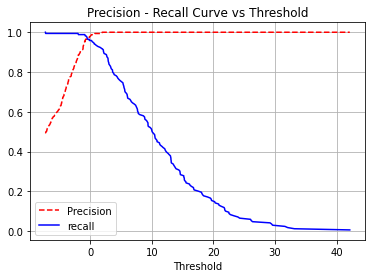

<Figure size 1800x720 with 0 Axes>

In [492]:
pre_rec_plot(pre, rec, thr)

In [493]:
def roc_curve_plot(FPR, TPR):
    plt.plot(FPR, TPR, 'r-', label='FPR : TPR')
    plt.plot([0, 1], [0, 1], 'b--', label='diagonal') # plotting the diagonal of the ROC curve.
#     plt.plot([0, 0.4], [0.4, 0.98], 'b--', label='checked:)') # plotting the diagonal of the ROC curve.
    plt.legend()
    plt.grid()
    plt.xlabel('False Postive Rate')
    plt.ylabel('True Postive Rate')
    plt.title('ROC curve of TPRate, FPRate')
    plt.show()

In [494]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thr = roc_curve(y_train, cross_log_score)

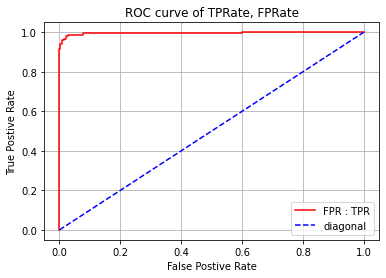

In [495]:
roc_curve_plot(fpr, tpr)

In [496]:
roc_auc_score(y_train, cross_log_score)*100

99.51586874663796

In [497]:
def pre_rec_direct_plot(recalls, precisions):
    plt.plot(recalls[:-1], precisions[:-1], 'b--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid()
    plt.legend(['Recall-Precision'])
    plt.title('Precisin - Recall Curve Directly')
    plt.show()

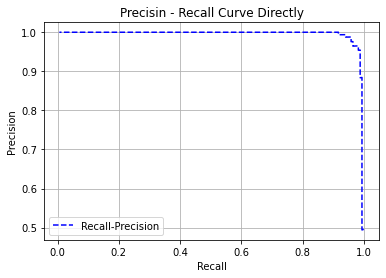

In [498]:
pre_rec_direct_plot(rec, pre)

In [501]:
# saving our trained model.
import joblib
joblib.dump(model_LogReg, 'log_reg_model.pkl')

['log_reg_model.pkl']

### let's practice on our testing dataset now.

In [502]:
X_test = full_pipeline.fit_transform(test_df)[:, :-1]
y_test = test_df['diagnosis_no'].copy()

In [503]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((455, 37), (114, 37), (455,), (114,))

In [504]:
# loading the final trained model.
test_model = joblib.load('log_reg_model.pkl')

In [505]:
log_test_pred = test_model.predict(X_test)

In [508]:
confusion_matrix(y_test, log_test_pred), accuracy_score(y_test, log_test_pred)*100

(array([[71,  0],
        [ 3, 40]], dtype=int64),
 97.36842105263158)

In [509]:
precision_score(y_test, log_test_pred)*100, recall_score(y_test, log_test_pred)*100

(100.0, 93.02325581395348)

In [523]:
test_df[-10:]['diagnosis']

76     B
305    B
26     M
403    B
328    M
364    B
6      M
548    B
408    M
468    M
Name: diagnosis, dtype: object

In [522]:
test_model.predict_proba(X_test)[-10:, :]

array([[9.99460126e-01, 5.39874101e-04],
       [9.99263481e-01, 7.36518556e-04],
       [4.63679945e-04, 9.99536320e-01],
       [9.98450031e-01, 1.54996857e-03],
       [6.77466567e-04, 9.99322533e-01],
       [9.97072094e-01, 2.92790619e-03],
       [5.17317974e-05, 9.99948268e-01],
       [9.99672837e-01, 3.27163178e-04],
       [5.00187118e-04, 9.99499813e-01],
       [2.99018896e-05, 9.99970098e-01]])

In [514]:
log_test_score = test_model.predict_proba(X_test)[:, 1] # let's take the prob of the 2nd class which is class `M`

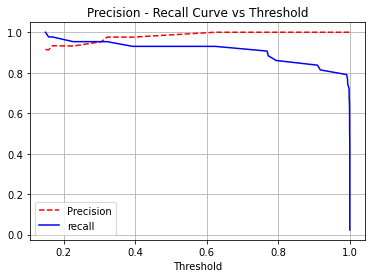

<Figure size 1800x720 with 0 Axes>

In [524]:
pre, rec, thr = precision_recall_curve(y_test, log_test_score)
pre_rec_plot(pre, rec, thr)

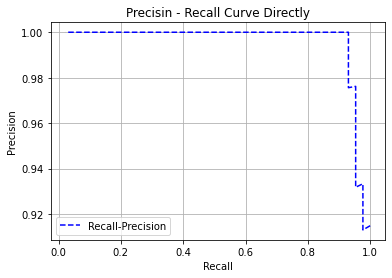

In [525]:
pre_rec_direct_plot(rec, pre)

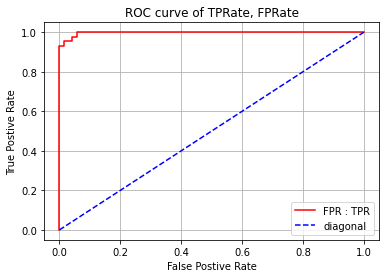

In [527]:
fpr, tpr, thr = roc_curve(y_test, log_test_score)
roc_curve_plot(fpr, tpr)

In [528]:
roc_auc_score(y_test, log_test_score)*100

99.737962659679